# 时间序列


## 考研MBA分数分析


为什么拿MBA因为数值少，好理解


2009~2020年 MBA分数分析


我们正好用时间序列分析一下2021年的分数线吧


> 不见得准确，因为数据量太少，但是可以好好理解一下时间序列

# 程序执行


## 加载数据


xls表mba.xlsx




In [1]:
import pandas as pd
df = pd.read_excel('./mba.xlsx', index_col='年份')
df

,总分(A),英语(A),管综(A),总分(B),英语(B),管综(B)
年份,,,,,,
2009年,155,50,85,145,45,77
2010年,165,47,94,155,42,84
2011年,165,45,90,155,40,80
2012年,150,41,82,140,36,72
2013年,155,41,82,145,37,72
2014年,160,41,82,150,36,72
2015年,160,40,80,150,35,70
2016年,165,39,78,155,34,68
2017年,170,42,84,160,37,74


## 时间序列图表



In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
df.plot()

<AxesSubplot:xlabel='年份'>

# 获取一下最佳p和q


我们在p=0、1、2、3、4和q=0、1、2中做对比


这时候画一个热力图效果很好

In [3]:
import numpy as np
from statsmodels.tsa import arima_model
import itertools
import seaborn as sns #热力图
import warnings
warnings.filterwarnings("ignore")
def thermodynamicOrder(df, ar=4, ma=2):
    results_aic = pd.DataFrame(\
        index=['AR{}'.format(i) for i in range(0, ar+1)],\
        columns=['MA{}'.format(i) for i in range(0, ma+1)])
    for p, q in itertools.product(range(0, ar+1), range(0, ma+1)):
        if p==0 and q==0:
            results_aic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
            continue
        try:
            results = arima_model.ARMA(df, (p, q)).fit()
            #返回不同pq下的model的BIC值
            results_aic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.aic
        except:
            continue
    results_aic = results_aic[results_aic.columns].astype(float)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.heatmap(results_aic,
                    #mask=results_aic.isnull(),
                    ax=ax,
                    annot=True, #将数字显示在热力图上
                    fmt='.2f',
                    )
    ax.set_title('AIC')
    plt.show()

## A区总分

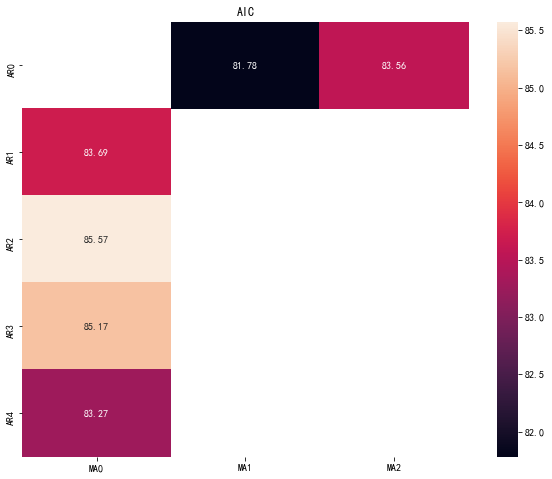

In [4]:
thermodynamicOrder(df['总分(A)'], 4, 2)

可以得到p=0，q=1 效果最好


## A区英语

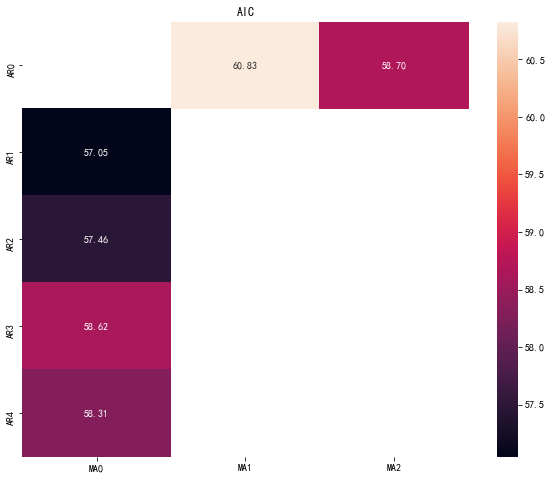

In [5]:
thermodynamicOrder(df['英语(A)'], 4, 2)

可以得到p=1，q=0效果最好


## A区管综

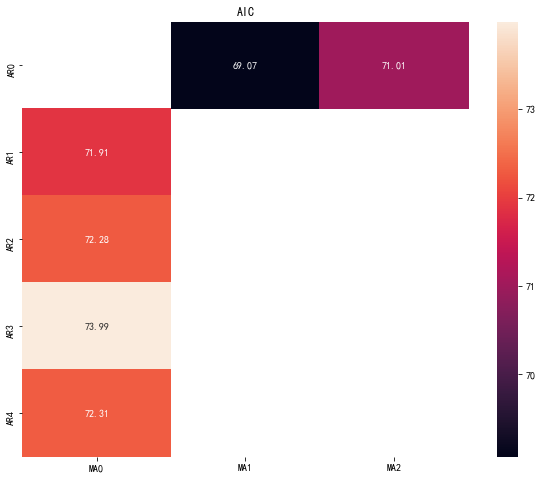

In [6]:
thermodynamicOrder(df['管综(A)'], 4, 2)

p=0，q=1效果最好


## B区总分

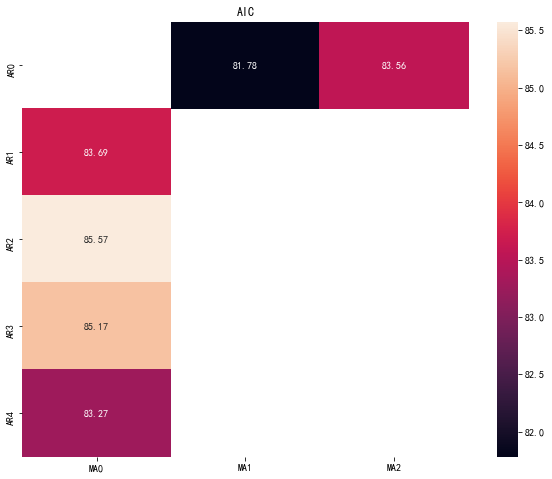

In [7]:
thermodynamicOrder(df['总分(B)'], 4, 2)

p=0，q=1


## B区英语

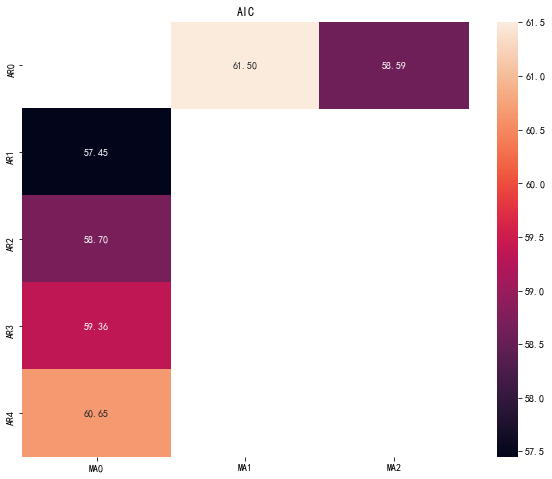

In [8]:
thermodynamicOrder(df['英语(B)'], 4, 2)

p=1，q=0


## B区管综

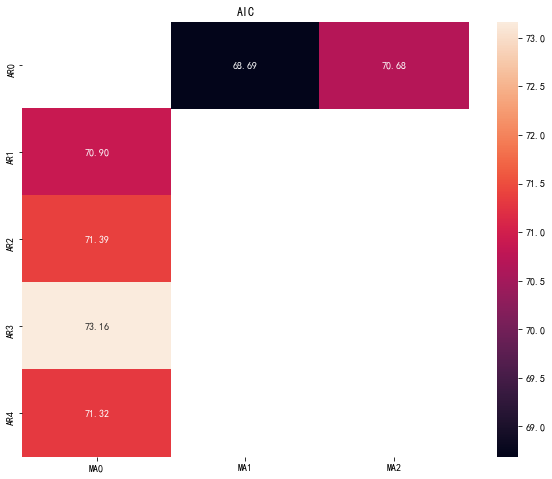

In [9]:
thermodynamicOrder(df['管综(B)'], 4, 2)

p=0，q=1


# 模型预测


## 创建模型预测2021年数据

In [10]:
arima_model.ARMA(df['总分(A)'], (0, 1)).fit().forecast(1)

(array([166.07142745]),
 array([5.11281472]),
 array([[156.05049474, 176.09236017]]))

In [11]:
arima_model.ARMA(df['英语(A)'], (1, 0)).fit().forecast(1)

(array([44.12855737]),
 array([1.92440793]),
 array([[40.35678715, 47.9003276 ]]))

In [12]:
arima_model.ARMA(df['管综(A)'], (0, 1)).fit().forecast(1)

(array([85.78637262]),
 array([3.08996814]),
 array([[79.73014636, 91.84259889]]))

我们预测2021年A区分数线为

## 推荐
总分:165
英语:44
管综:85

## 最高
总分:175
英语:48
管综:91

## 最低
总分:156
英语:40
管综:80

In [13]:
arima_model.ARMA(df['总分(B)'], (0, 1)).fit().forecast(1)

(array([156.07142745]),
 array([5.11281472]),
 array([[146.05049474, 166.09236017]]))

In [14]:
arima_model.ARMA(df['英语(B)'], (1, 0)).fit().forecast(1)

(array([39.13014005]), array([1.96343784]), array([[35.2818726, 42.9784075]]))

In [15]:
arima_model.ARMA(df['管综(B)'], (0, 1)).fit().forecast(1)

(array([75.75000016]),
 array([2.96273148]),
 array([[69.94315315, 81.55684716]]))

我们预测2021年B区分数线为

## 推荐
总分:155
英语:39
管综:76

## 最高
总分:165
英语:43
管综:82

## 最低
总分:146
英语:35
管综:70


预测是不会考虑外因的，我倾向于按照最高来算


## A区


总分:175
英语:48
管综:91


## B区


总分:165
英语:43
管综:82


到了国家线发榜时间咱们看看预测结果~


> 再次声明，不要过多在意数值，本文只是时间序列的应用